<a href="https://colab.research.google.com/github/doissegundos/Machine_learning_Dell_Lead/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='tensor.png'>

<img src='parcs.png'>

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [22]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
#tamanho do dataset de treinamento
train_images.shape

(60000, 28, 28)

In [24]:
#tamanho do dataset de teste
test_images.shape

(10000, 28, 28)

In [25]:
#Quantidade de classes do dataset
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Digito: 5


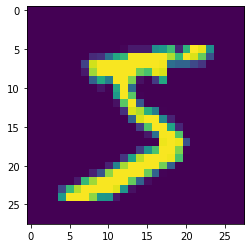

In [26]:
#Exemplo de digito do dataset de treinamento
plt.imshow(train_images[0])
print("Digito: "+str(train_labels[0]))

Digito: 7


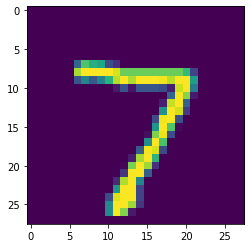

In [27]:
#Exemplo de digito do dataset de teste
plt.imshow(test_images[0])
print("Digito: "+str(test_labels[0]))

In [28]:
#normalizando os pixels das imagens do dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
Total params: 107,440
Trainable params: 107,440
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2453 - accuracy: 0.9278
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9679
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0728 - accuracy: 0.9771
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0570 - accuracy: 0.9816
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9853
Epoch 6/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0366 - accuracy: 0.9879
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 8/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0235 - accuracy: 0.9924


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0961 - accuracy: 0.9744
Test accuracy: 0.974399983882904


Como visto acima a acurácia de teste foi de 97.44%

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([1.5200335e-07, 1.5684708e-06, 9.4993266e-06, 9.7159898e-07,
       7.7974355e-10, 2.5737577e-08, 1.1718431e-12, 9.9998605e-01,
       1.6928187e-08, 1.7366306e-06], dtype=float32)

In [20]:
np.argmax(predictions[0])

7

In [21]:
test_labels[0]

7

In [22]:
img = test_images[0]

print(img.shape)

(28, 28)


In [23]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5200291e-07 1.5684708e-06 9.4993084e-06 9.7159705e-07 7.7974205e-10
  2.5737478e-08 1.1718409e-12 9.9998605e-01 1.6928121e-08 1.7366273e-06]]


In [25]:
np.argmax(predictions_single[0])

7